In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

05/30/2020 13:00:39 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 13:00:48 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 13:00:58 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 13:01:07 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 13:01:16 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run01_mc_MNI_masked.nii.gz wi

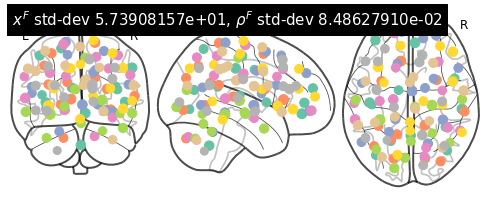

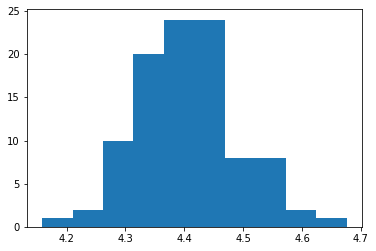

(<nilearn.plotting.displays.OrthoProjector at 0x7f33df0fbe90>,
 tensor([[-4.0153e+01, -2.1085e+01,  1.1244e+01],
         [ 5.4607e+01, -2.5582e+01,  3.9753e+01],
         [ 3.7216e+01, -4.4510e+01,  2.0255e+01],
         [ 5.2631e+00,  4.4077e+01, -7.9990e+00],
         [-1.1987e+01, -5.8126e+00,  3.8350e+01],
         [-2.0053e+01, -5.9311e+01,  6.0066e+01],
         [ 7.3654e-01, -5.3464e+01, -4.1581e+01],
         [ 3.9115e+01, -6.9352e+01,  1.7029e+01],
         [-3.6017e+01, -7.4130e+01, -3.3172e+00],
         [ 4.6899e+01,  6.6901e+00,  4.1419e+00],
         [-4.2608e+01, -1.8691e+01,  5.2644e+01],
         [-3.6388e+01,  4.6683e+01,  3.4924e+00],
         [-8.6432e+00,  5.5639e+01,  1.8772e+01],
         [ 2.8143e+01,  4.8763e+00,  1.7581e+01],
         [-2.0512e+01, -5.7599e+01,  1.1545e+00],
         [-1.3691e+01, -5.2174e+01,  2.4650e+01],
         [-3.0070e+01,  3.7021e+00,  5.5030e+01],
         [ 3.2163e+01, -8.0742e+01, -4.1160e+00],
         [-3.3297e+01, -4.3322e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

708

In [9]:
dtfa.num_voxels

81638

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-1, 'p': 1e-2}, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    blocks_filter=affvids_db.inference_filter(training=True))

05/30/2020 13:11:27 [Epoch 1] (18787ms) Posterior free-energy 7.39978691e+10 = KL from prior 4.46669150e+06 - log-likelihood -7.39933880e+10
05/30/2020 13:11:27 Saving checkpoint...
05/30/2020 13:11:44 [Epoch 2] (17194ms) Posterior free-energy 7.20292823e+10 = KL from prior 6.68686125e+05 - log-likelihood -7.20286188e+10
05/30/2020 13:12:00 [Epoch 3] (16065ms) Posterior free-energy 7.05686897e+10 = KL from prior 5.85120312e+05 - log-likelihood -7.05681080e+10
05/30/2020 13:12:16 [Epoch 4] (16069ms) Posterior free-energy 6.94964060e+10 = KL from prior 5.48801750e+05 - log-likelihood -6.94958653e+10
05/30/2020 13:12:32 [Epoch 5] (16095ms) Posterior free-energy 6.87219835e+10 = KL from prior 5.29672500e+05 - log-likelihood -6.87214510e+10
05/30/2020 13:12:48 [Epoch 6] (16105ms) Posterior free-energy 6.81124782e+10 = KL from prior 5.14399969e+05 - log-likelihood -6.81119539e+10
05/30/2020 13:13:05 [Epoch 7] (16103ms) Posterior free-energy 6.76523663e+10 = KL from prior 5.16641594e+05 - log

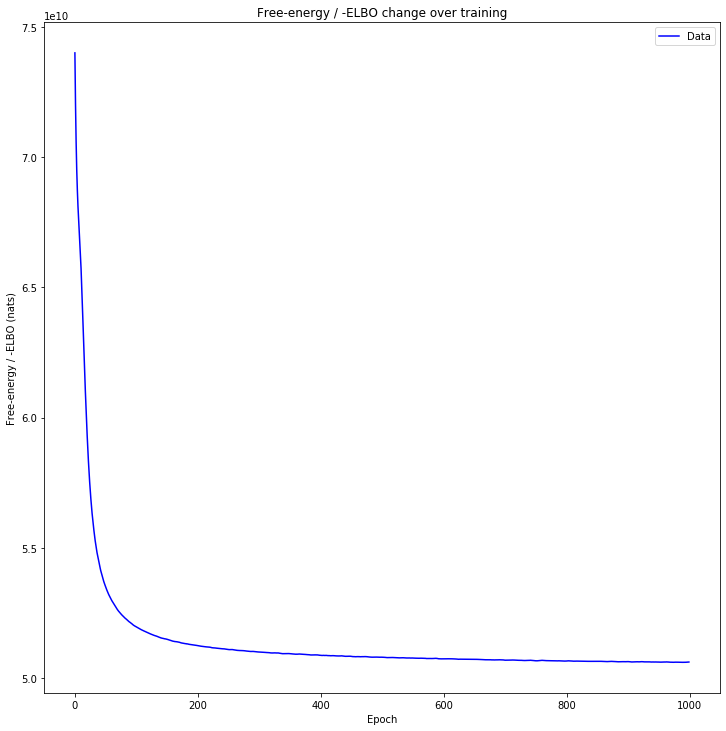

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


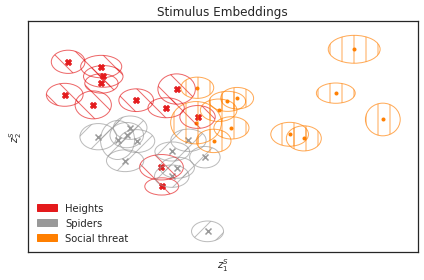

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='affvids_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


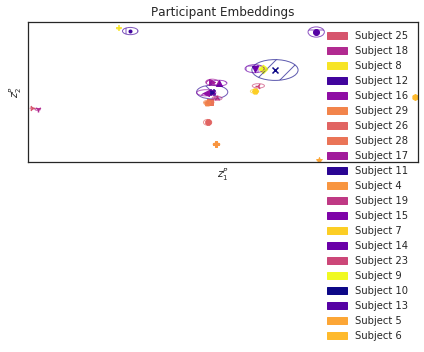

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

05/30/2020 17:40:18 Plotting factors for Participant 7, run 2


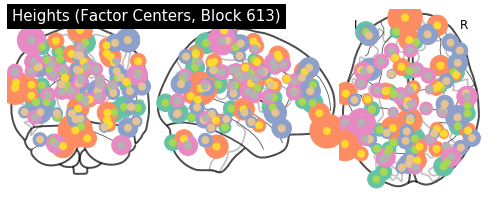

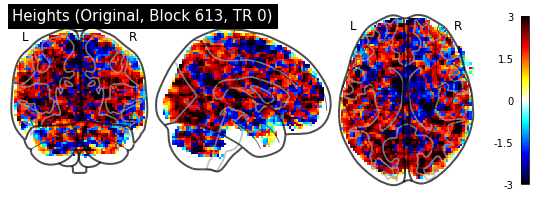

05/30/2020 17:40:22 Reconstruction Error (Frobenius Norm): 1.53263718e+02 out of 1.30442273e+03


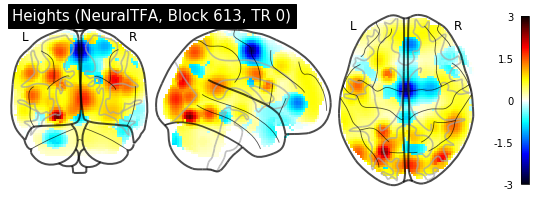

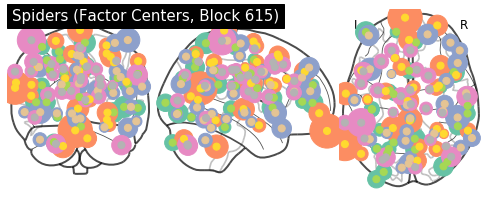

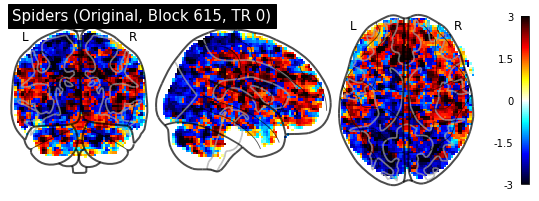

05/30/2020 17:40:27 Reconstruction Error (Frobenius Norm): 2.04296463e+02 out of 1.33834436e+03


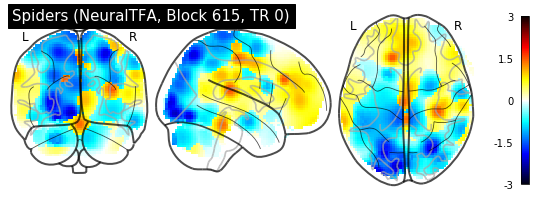

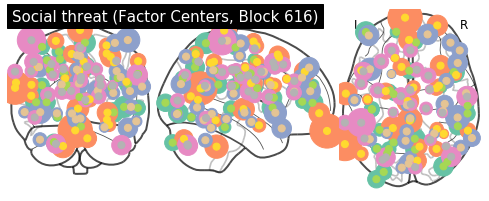

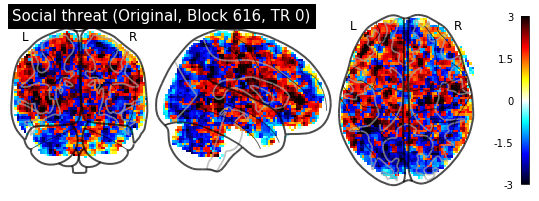

05/30/2020 17:40:31 Reconstruction Error (Frobenius Norm): 2.06615555e+02 out of 1.43787317e+03


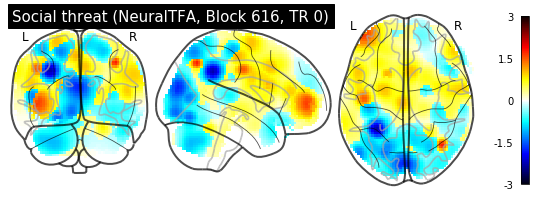

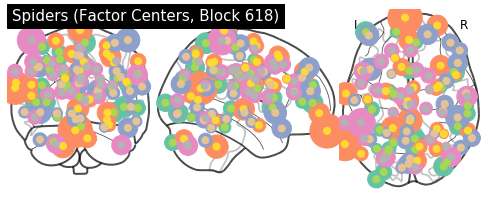

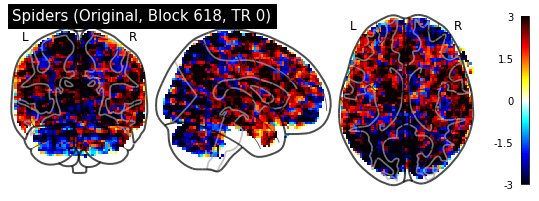

05/30/2020 17:40:36 Reconstruction Error (Frobenius Norm): 2.25878189e+02 out of 1.52667554e+03


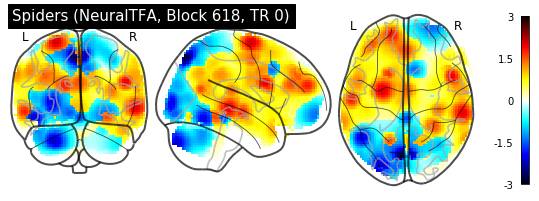

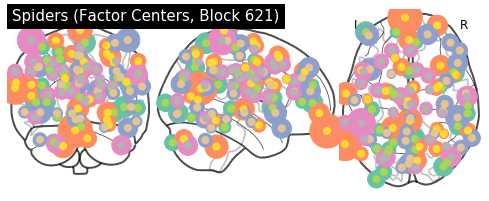

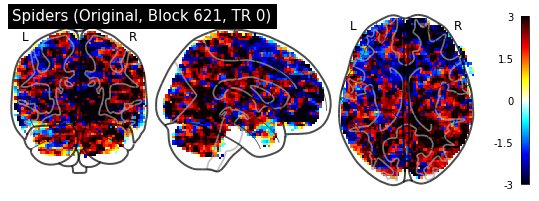

05/30/2020 17:40:40 Reconstruction Error (Frobenius Norm): 1.69652069e+02 out of 1.40607410e+03


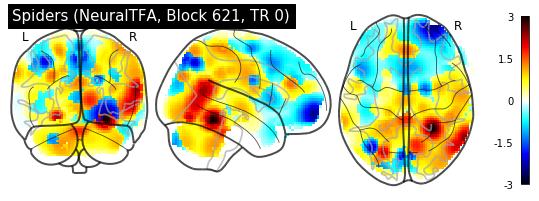

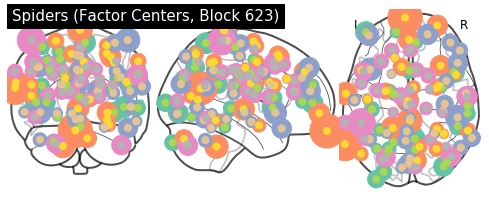

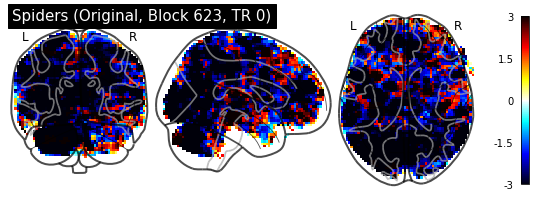

05/30/2020 17:40:45 Reconstruction Error (Frobenius Norm): 3.39111664e+02 out of 1.55214832e+03


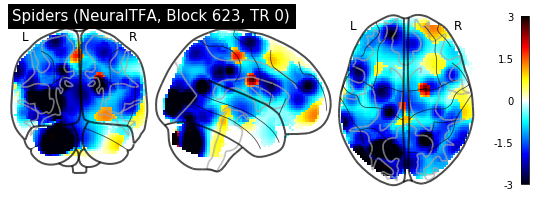

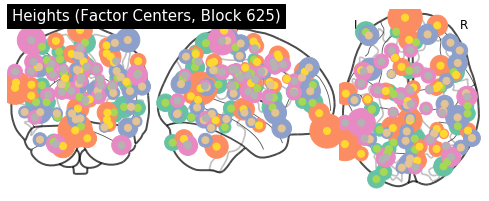

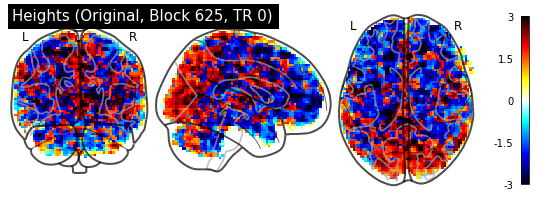

05/30/2020 17:40:49 Reconstruction Error (Frobenius Norm): 1.40673996e+02 out of 1.24685510e+03


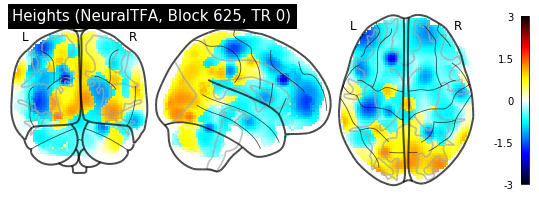

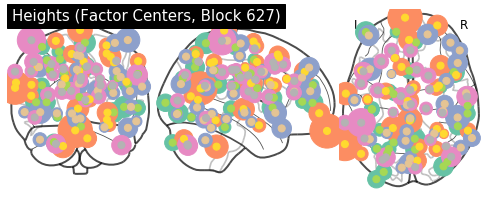

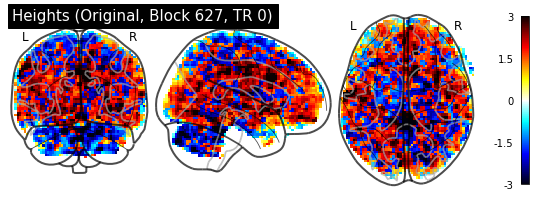

05/30/2020 17:40:54 Reconstruction Error (Frobenius Norm): 1.78406113e+02 out of 1.32294067e+03


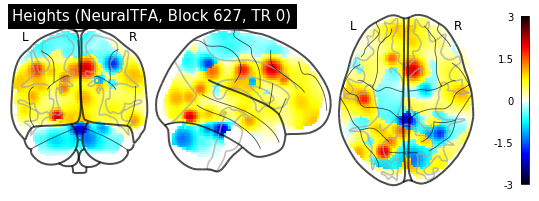

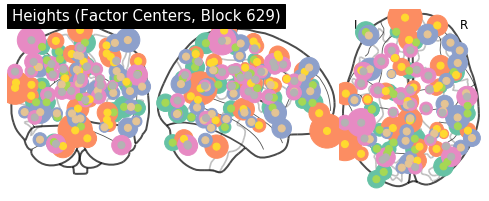

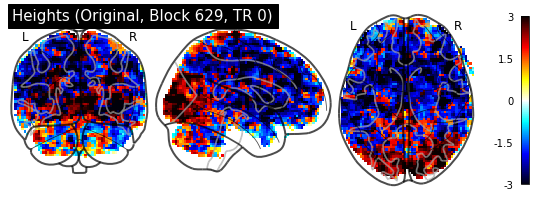

05/30/2020 17:40:58 Reconstruction Error (Frobenius Norm): 1.75239975e+02 out of 1.37790063e+03


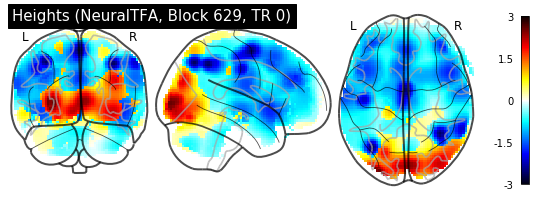

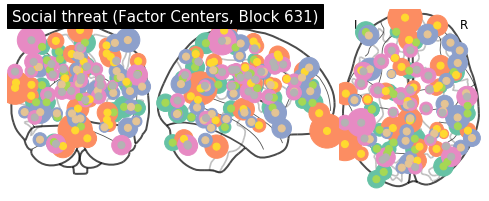

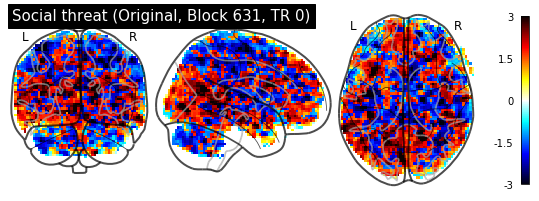

05/30/2020 17:41:03 Reconstruction Error (Frobenius Norm): 1.36741058e+02 out of 1.32418530e+03


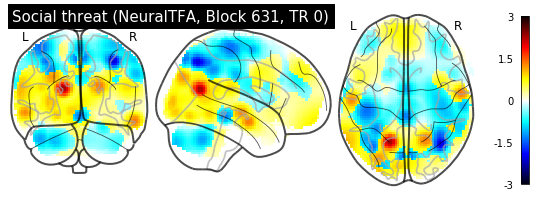

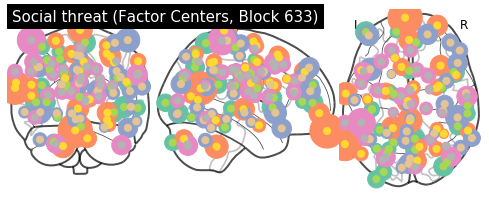

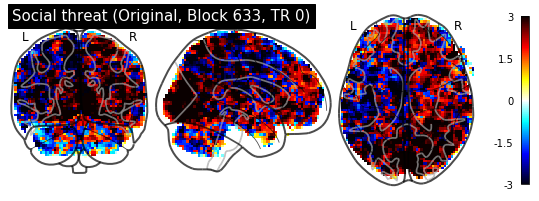

05/30/2020 17:41:07 Reconstruction Error (Frobenius Norm): 1.78407181e+02 out of 1.38168286e+03


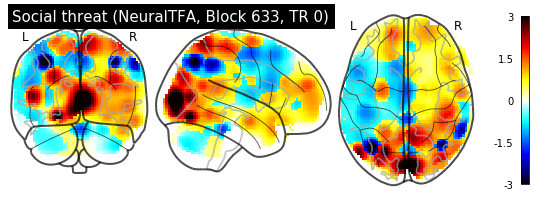

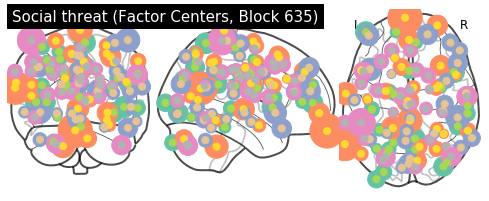

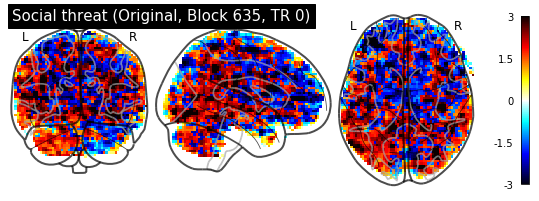

05/30/2020 17:41:12 Reconstruction Error (Frobenius Norm): 1.36295807e+02 out of 1.48441492e+03


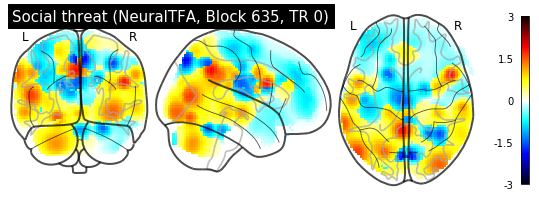

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

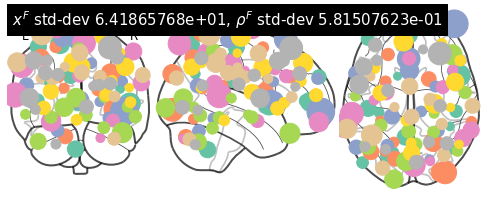

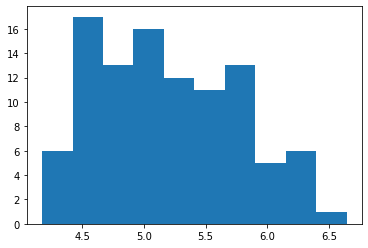

(<nilearn.plotting.displays.OrthoProjector at 0x7f31224edc90>,
 tensor([[-32.4224, -29.5937,  24.7750],
         [ 48.5216, -28.0036,  51.2400],
         [ 42.0528, -43.9024,  17.5267],
         [ -2.1692,  52.7947,   4.4821],
         [-13.0580,   8.8831,  37.7379],
         [-21.1451, -73.6901,  64.5448],
         [ -4.9704, -55.1485, -45.8029],
         [ 42.9577, -68.0786,  33.9206],
         [-49.8872, -81.9784,   3.0888],
         [ 52.0896,   9.6337,   1.9202],
         [-44.0432, -24.9208,  61.8919],
         [-44.6361,  48.0222,   5.5291],
         [-10.1778,  62.0487,  30.7396],
         [ 19.7712,   5.8611,  17.5755],
         [-26.2058, -69.8803, -13.5049],
         [-16.9047, -60.5351,  18.2338],
         [-25.8117,   3.1082,  61.6752],
         [ 36.9992, -92.2980,  -3.8650],
         [-31.3074, -37.8041,  17.3183],
         [ 64.6272, -39.0136,  21.5071],
         [-15.6237, -77.9723, -32.3995],
         [ 24.3769, -60.5943,  77.6751],
         [-22.9651,  31.7146,  30.8

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

05/30/2020 17:41:53 Average reconstruction error (MSE): 9.63821798e-01
05/30/2020 17:41:53 Average data norm (Euclidean): 1.09839495e+00
05/30/2020 17:41:53 Percent average reconstruction error: 0.309253


(0.9638217984088148, 1.0983949463766804, 0.0030925335997574253)

In [20]:
dtfa.average_reconstruction_error(weighted=False)

05/30/2020 17:42:33 Average reconstruction error (MSE): 1.23846778e+03 +/- 7.21419262e+01
05/30/2020 17:42:33 Average data norm (Euclidean): 1.41168145e+03 +/- 8.14817650e+01
05/30/2020 17:42:33 Percent average reconstruction error: 87.867165 +/- 5.00617623e+00


(array([1252.55517578, 1180.50244141, 1279.57312012, 1266.33520508,
        1233.20605469, 1288.6920166 , 1182.76696777, 1270.89855957,
        1233.39099121, 1210.62365723, 1282.85510254, 1306.84289551,
        1187.98779297, 1239.49536133, 1262.22338867, 1210.33447266,
        1245.93029785, 1236.67150879, 1250.11193848, 1244.2923584 ,
        1246.27868652, 1255.13781738, 1241.36706543, 1250.57470703,
        1244.54589844, 1306.52307129, 1192.28771973, 1316.08850098,
        1298.99902344, 1291.56567383, 1267.0144043 , 1237.57995605,
        1209.43603516, 1209.25158691, 1214.40710449, 1249.89733887,
        1208.03930664, 1255.76745605, 1223.19677734, 1171.00695801,
        1238.67443848, 1343.01733398, 1231.71582031, 1628.41125488,
        1225.95483398, 1326.77563477, 1399.91699219, 1227.20397949,
        1203.61413574, 1154.6574707 , 1227.98840332, 1253.82995605,
        1236.10461426, 1344.06787109, 1228.42883301, 1296.50598145,
        1243.7355957 , 1191.76123047, 1215.78649

In [21]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [22]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [23]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [24]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [26]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [28]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [29]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [30]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


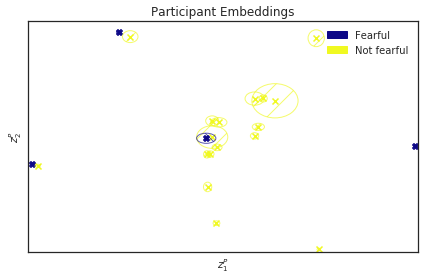

In [31]:
dtfa.scatter_subject_embedding(labeler=subject_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


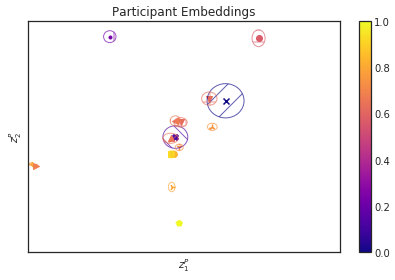

In [32]:
dtfa.scatter_subject_embedding(labeler=heights_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


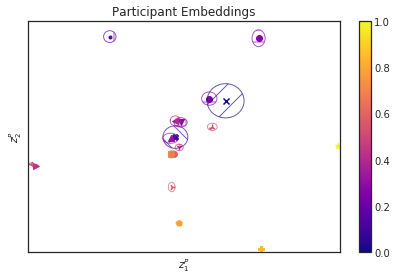

In [33]:
dtfa.scatter_subject_embedding(labeler=spiders_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


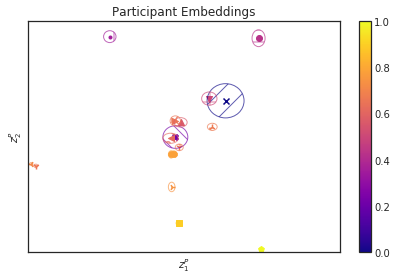

In [34]:
dtfa.scatter_subject_embedding(labeler=social_threat_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


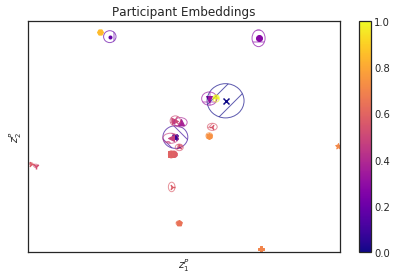

In [35]:
dtfa.scatter_subject_embedding(labeler=subject_average_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_subject_embedding.pdf')